<a href="https://colab.research.google.com/github/MelissaMatindi/Frameworks_Assignment/blob/main/Our_World_in_Data_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 **COVID-19 Data Analysis and Visualization**



## 🌍 **Project Overview**
This project explores the **Our World in Data COVID-19 dataset**, a comprehensive global collection of COVID-19 statistics. The dataset contains daily records of confirmed cases, deaths, recoveries, tests, and vaccinations across countries and regions.  

The goal of this project is to demonstrate **real-world data analysis and cleaning skills** by working with a dataset that is messy, large, and requires thoughtful preparation before insights can be extracted. Through this process, we will apply the full **data science workflow** — from data loading and preprocessing to exploratory data analysis and interactive visualization.

---

## 🎯 **Objectives**
1. **Data Loading & Exploration**  
   - Import the dataset into Google Colab.  
   - Inspect the data structure, columns, datatypes, and missing values.  

2. **Data Cleaning & Preparation**  
   - Handle missing values and inconsistencies.  
   - Normalize column formats (dates, country names, numerical values).  
   - Create derived features such as daily new cases and 7-day rolling averages.  

3. **Exploratory Data Analysis (EDA)**  
   - Analyze COVID-19 trends across countries and regions.  
   - Identify peaks, outliers, and correlations between key indicators (cases, deaths, vaccinations).  
   - Compare countries using per-capita metrics for fairness.  

4. **Visualization & Insights**  
   - Build compelling visualizations of COVID-19 trends over time.  
   - Highlight global and regional comparisons.  
   - Showcase insights into the impact of the pandemic across different regions.  

5. **Interactive Dashboard (Streamlit)**  
   - Deploy a Streamlit dashboard for interactive exploration.  
   - Include dropdowns/filters for country and date range selection.  
   - Provide visual summaries and downloadable insights for end-users.  

---

## 🚀 Why This Project?
This project was chosen because it:  
- Represents a **real-world dataset** with global relevance.  
- Requires **cleaning and preprocessing** (e.g. handling missing values, normalizing data).  
- Enables a wide range of **analytical techniques and visual storytelling**.  
- Aligns perfectly with my portfolio needs by demonstrating **practical problem-solving with real data**.  

By the end of this project, I will have developed a **complete, end-to-end data science pipeline** while generating valuable insights from one of the most impactful global health events in recent history.


# Data Loading and Inspection

In [ ]:
# Upload the dataset zip file
from google.colab import files
uploaded = files.upload()

Saving our-world-in-covid-19.zip to our-world-in-covid-19.zip


In [ ]:
import zipfile
import os

# Unzip the file
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("covid_data")

# Check extracted files
os.listdir("covid_data")

['owid-covid-data.csv']

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("covid_data/owid-covid-data.csv")

In [ ]:
# Preview data
print("Shape:", df.shape)

Shape: (350085, 67)


In [ ]:
print("\nColumns:", df.columns.tolist())


Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred

In [ ]:
df.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                                        350085 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

In [ ]:
# Missing values check
missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing values (top 10):\n", missing.head(10))


Missing values (top 10):
 weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality                           337901
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality_cumulative_per_million    337901
weekly_hosp_admissions                     326832
weekly_hosp_admissions_per_million         326832
icu_patients_per_million                   312470
icu_patients                               312470
dtype: int64


# 🧹 Data Cleaning

In [ ]:
# Count duplicates before removal
dup_count = df.duplicated().sum()
print("Duplicates found:", dup_count)

# Drop duplicates
df.drop_duplicates(inplace=True)
print("New shape after dropping duplicates:", df.shape)

Duplicates found: 0
New shape after dropping duplicates: (350085, 67)


In [ ]:
import numpy as np

# Replace empty strings with NaN
df.replace("", np.nan, inplace=True)

# Confirm missing values again
print("Missing values (top 10):\n", df.isna().sum().sort_values(ascending=False).head(10))

Missing values (top 10):
 weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality                           337901
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality_cumulative_per_million    337901
weekly_hosp_admissions                     326832
weekly_hosp_admissions_per_million         326832
icu_patients_per_million                   312470
icu_patients                               312470
dtype: int64


In [ ]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Check if conversion worked
print("Date range:", df["date"].min(), "to", df["date"].max())

Date range: 2020-01-01 00:00:00 to 2023-10-24 00:00:00


In [ ]:
# Convert all numeric-looking columns to numeric
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col], errors="ignore")
        except:
            pass

print("Dtypes after conversion:\n", df.dtypes.head(10))

Dtypes after conversion:
 iso_code                       object
continent                      object
location                       object
date                   datetime64[ns]
total_cases                   float64
new_cases                     float64
new_cases_smoothed            float64
total_deaths                  float64
new_deaths                    float64
new_deaths_smoothed           float64
dtype: object


/tmp/ipython-input-1504679495.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


In [ ]:
# Drop columns with >90% missing values
threshold = 0.85
missing_fraction = df.isna().mean()
drop_cols = missing_fraction[missing_fraction > threshold].index.tolist()

print("Columns to drop (>", int(threshold*100), "% missing):", drop_cols)

df.drop(columns=drop_cols, inplace=True)
print("New shape after dropping high-missing columns:", df.shape)

Columns to drop (> 85 % missing): ['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'total_boosters', 'total_boosters_per_hundred']
New shape after dropping high-missing columns: (350085, 53)


In [ ]:
print("✅ Cleaning Complete!")
print("Shape:", df.shape)
print("Remaining missing values (top 10):\n", df.isna().sum().sort_values(ascending=False).head(10))

✅ Cleaning Complete!
Shape: (350085, 53)
Remaining missing values (top 10):
 new_vaccinations                       284739
people_fully_vaccinated                277510
people_fully_vaccinated_per_hundred    277510
new_tests_per_thousand                 274682
new_tests                              274682
people_vaccinated                      274174
people_vaccinated_per_hundred          274174
total_vaccinations_per_hundred         270777
total_vaccinations                     270777
total_tests_per_thousand               270698
dtype: int64


To ensure the dataset is reliable and ready for analysis, several cleaning steps were applied:


*   **Handled Missing Values:** Replaced blank strings with NaN, dropped columns with more than 85% missing values such as ICU and hospital patient counts and booster vaccination counts.

*  **Removed Duplicates:** Checked for and removed duplicate rows to avoid bias.

*   **Normalized Data Formats:** Converted the date column into a proper datetime format and ensured numeric columns were properly typed.
*   **Reduced Dataset Size:** Dropped 6 highly incomplete columns.


**New dataset shape after cleaning:** (350,085 rows × 53 columns).

**Remaining Missing Values:** Some vaccination and testing-related columns still contain missing values but were retained since they may provide valuable insights for analysis.

# 🔎 Exploratory Data Analysis (EDA)

In [ ]:
# Basic summary
print("Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes.head(15))

# Quick descriptive statistics
df.describe(include="all").transpose().head(15)

Shape: (350085, 53)

Column Types:
 iso_code                                  object
continent                                 object
location                                  object
date                              datetime64[ns]
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
dtype: object


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
iso_code,350085,255,SWE,1391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,333420,6,Africa,78946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,350085,255,Sweden,1391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,350085,NaN,NaN,NaN,2021-11-25 18:35:40.040275712,2020-01-01 00:00:00,2020-12-16 00:00:00,2021-11-26 00:00:00,2022-11-06 00:00:00,2023-10-24 00:00:00,NaN
total_cases,312088.0,NaN,NaN,NaN,6683354.190004,1.0,8090.0,70205.0,740955.75,771407061.0,40689025.722537
new_cases,340457.0,NaN,NaN,NaN,9601.634468,0.0,0.0,2.0,264.0,8401961.0,110276.887247
new_cases_smoothed,339198.0,NaN,NaN,NaN,9637.065867,0.0,0.286,24.857,497.857,6402036.286,94477.843784
total_deaths,290501.0,NaN,NaN,NaN,86021.804355,1.0,127.0,1328.0,11922.0,6972139.0,439887.284465
new_deaths,340511.0,NaN,NaN,NaN,85.511055,0.0,0.0,0.0,3.0,27939.0,613.687971
new_deaths_smoothed,339281.0,NaN,NaN,NaN,85.817071,0.0,0.0,0.143,5.143,14822.0,559.130004


### **1. Global Trends Over Time**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


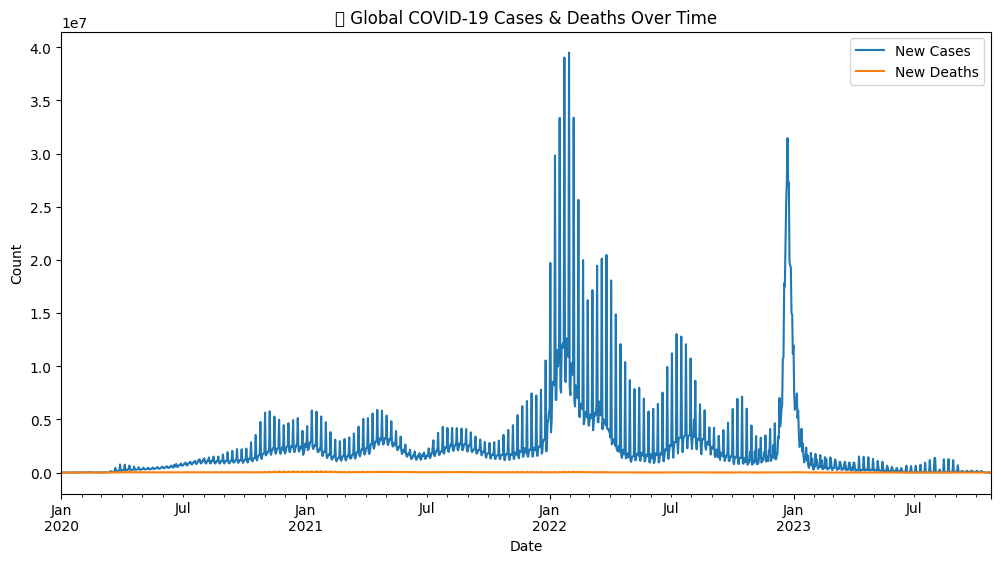

In [ ]:
import matplotlib.pyplot as plt

# Group by date (global aggregate)
global_trends = df.groupby("date")[["new_cases", "new_deaths", "new_vaccinations"]].sum()

# Plot trends
plt.figure(figsize=(12,6))
global_trends["new_cases"].plot(label="New Cases")
global_trends["new_deaths"].plot(label="New Deaths")
plt.title("🌍 Global COVID-19 Cases & Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

### **2. Top 10 Countries By Total Cases**

In [ ]:
# Keep only rows that correspond to actual countries
df_countries = df[~df["iso_code"].str.startswith("OWID")].copy()

print("Shape after filtering countries only:", df_countries.shape)

Shape after filtering countries only: (326222, 53)


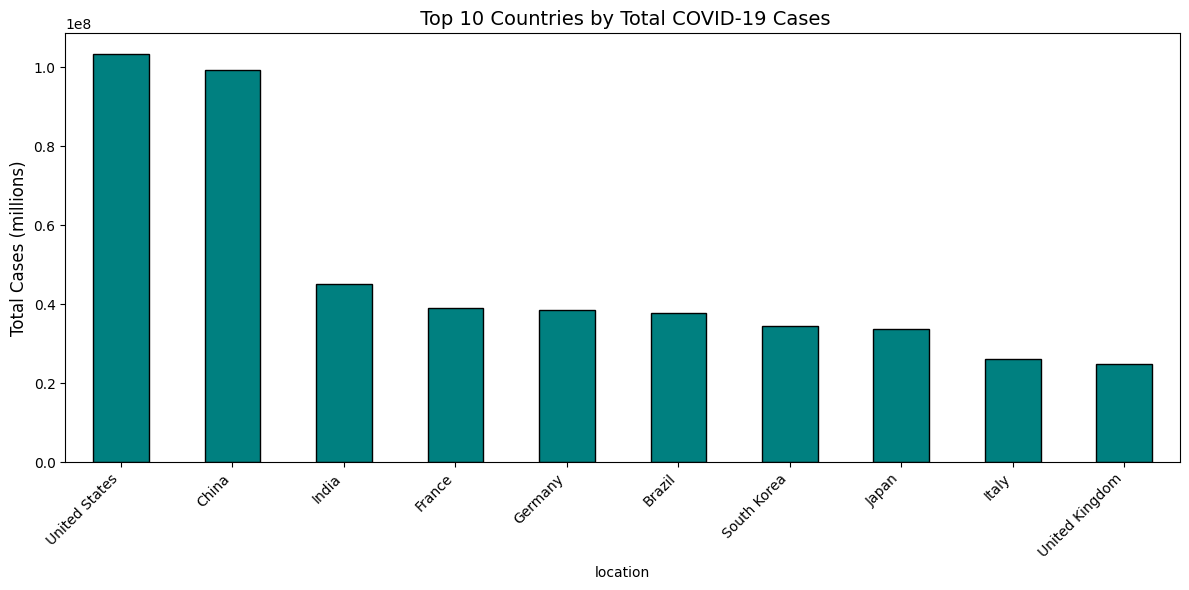

In [ ]:
# Top 10 countries by total cases
latest_cases = (
    df_countries.groupby("location")["total_cases"]
    .max()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
latest_cases.plot(kind="bar", color="teal", edgecolor="black")
plt.title(" Top 10 Countries by Total COVID-19 Cases", fontsize=14)
plt.ylabel("Total Cases (millions)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **3. Correlation Check**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


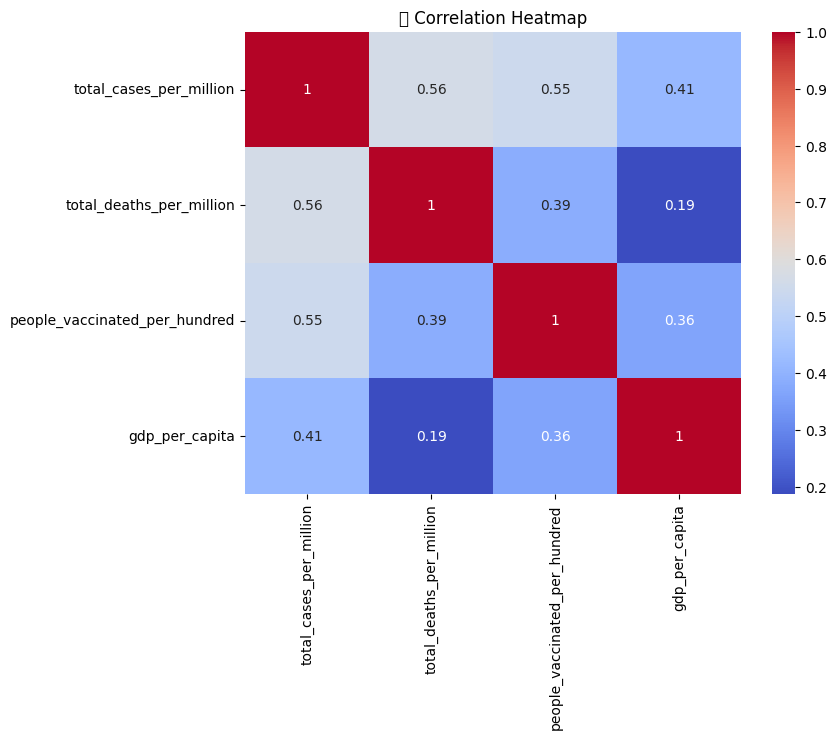

In [ ]:
# Select key numeric columns
corr = df[["total_cases_per_million", "total_deaths_per_million",
           "people_vaccinated_per_hundred", "gdp_per_capita"]].corr()

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("🔗 Correlation Heatmap")
plt.show()

### **4. COVID-19 Deaths Over Time**

/tmp/ipython-input-145806060.py:14: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


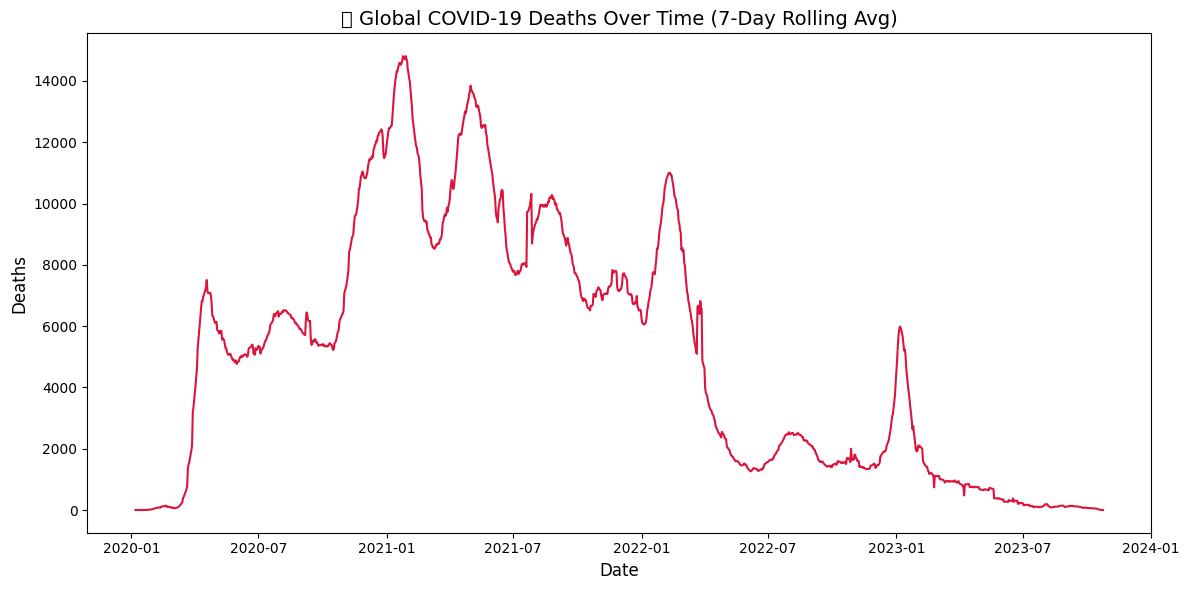

In [ ]:
# Global trend (using only countries, not OWID groups)
global_trend = (
    df_countries.groupby("date")["new_deaths"]
    .sum()
    .rolling(7)
    .mean()  # 7-day rolling average for smoothing
)

plt.figure(figsize=(12,6))
plt.plot(global_trend, color="crimson")
plt.title("🕒 Global COVID-19 Deaths Over Time (7-Day Rolling Avg)", fontsize=14)
plt.ylabel("Deaths", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.tight_layout()
plt.show()

### 🕒 Global COVID-19 Deaths Over Time  

This chart shows the trajectory of COVID-19 deaths worldwide using a 7-day rolling average.  
We can clearly see the major pandemic **waves**:  
- The **initial outbreak in early 2020** 🌍  
- The **Delta variant surge in 2021** 📈  
- The **Omicron wave in late 2021–2022** 🔄  

This visualization highlights how the pandemic evolved, underscoring the importance of global response measures.


## **5. Vaccination Progress of Top 5 Countries**

/tmp/ipython-input-495643901.py:19: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


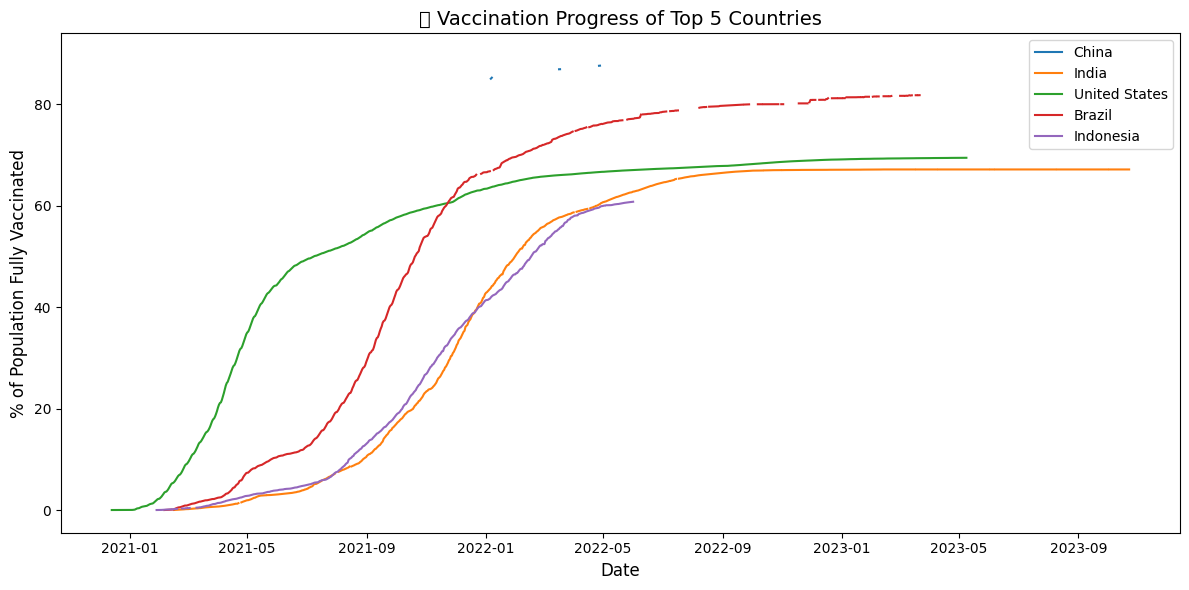

In [ ]:
# Pick top 5 countries by total vaccinations
top5_vax = (
    df_countries.groupby("location")["total_vaccinations"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

plt.figure(figsize=(12,6))
for country in top5_vax:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["people_fully_vaccinated_per_hundred"], label=country)

plt.title("💉 Vaccination Progress of Top 5 Countries", fontsize=14)
plt.ylabel("% of Population Fully Vaccinated", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 💉 Vaccination Progress of Top 5 Countries  

This plot compares vaccination rollouts in the top 5 countries by total vaccinations.  
We observe that:  
- Some countries rapidly vaccinated large portions of their populations (steep rise 📊).  
- Others lagged, showing disparities in **healthcare access and distribution** 🌍.  

Vaccinations were key in reducing deaths and severe hospitalizations, but progress was unequal across nations.


## **6. Case Fatality Rate**

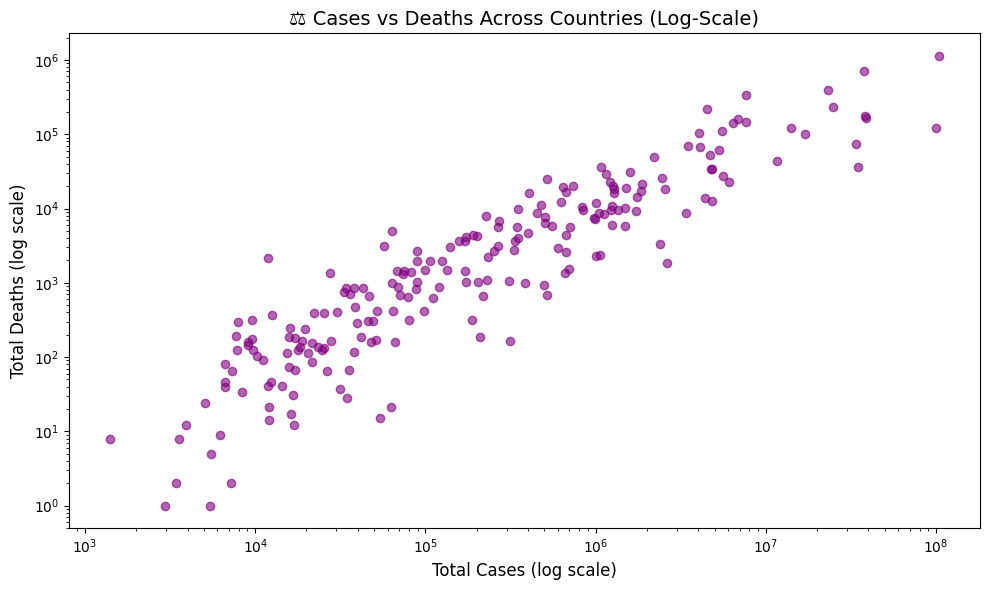

In [ ]:
# Take the latest data for each country
latest_df = (
    df_countries.sort_values("date")
    .groupby("location")
    .tail(1)
)

plt.figure(figsize=(10,6))
plt.scatter(latest_df["total_cases"], latest_df["total_deaths"], alpha=0.6, color="purple")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Total Cases (log scale)", fontsize=12)
plt.ylabel("Total Deaths (log scale)", fontsize=12)
plt.title("⚖️ Cases vs Deaths Across Countries (Log-Scale)", fontsize=14)
plt.tight_layout()
plt.show()

## **7. Stringency Index VS New Cases**

/tmp/ipython-input-1983324644.py:10: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


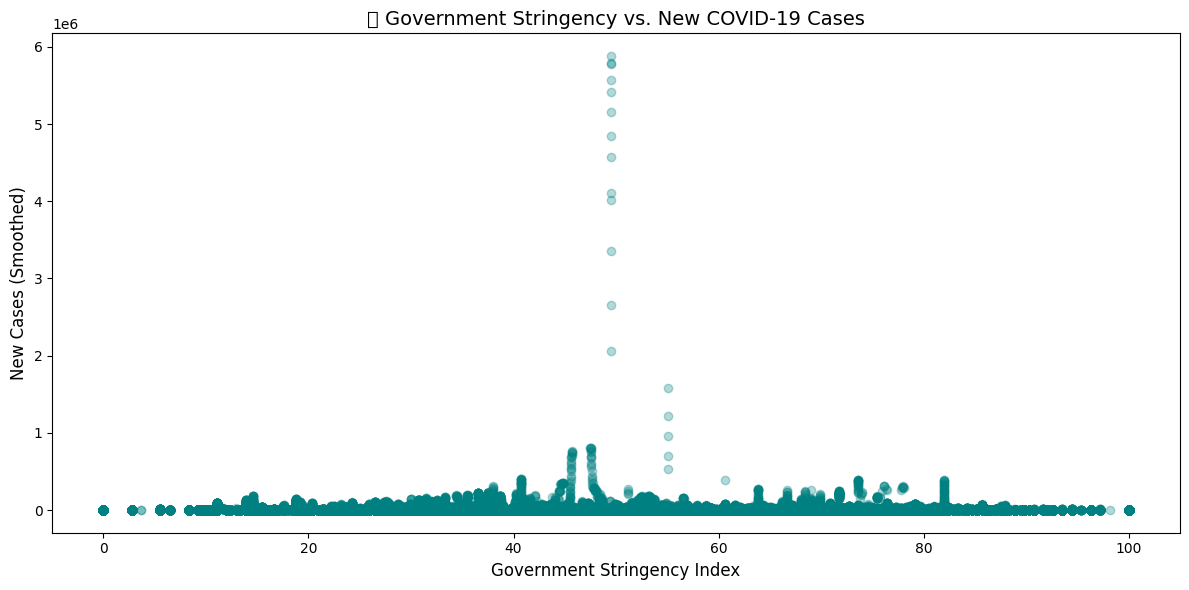

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(
    df_countries["stringency_index"],
    df_countries["new_cases_smoothed"],
    alpha=0.3, color="teal"
)
plt.xlabel("Government Stringency Index", fontsize=12)
plt.ylabel("New Cases (Smoothed)", fontsize=12)
plt.title("📏 Government Stringency vs. New COVID-19 Cases", fontsize=14)
plt.tight_layout()
plt.show()

###  ***Government Stringency vs. COVID-19 Cases***  

This visualization examines how strict government policies (stringency index) correlate with reported new cases.  
Interestingly, even countries with **high stringency scores** sometimes recorded high cases, reflecting:  
- **Policy timing delays**  
- **Population compliance differences**
- **Testing/reporting capacity**   

Stringency alone was not enough; effective enforcement and timing were crucial.


### **8. Heatmap Of Correlations Between Key Indicators**

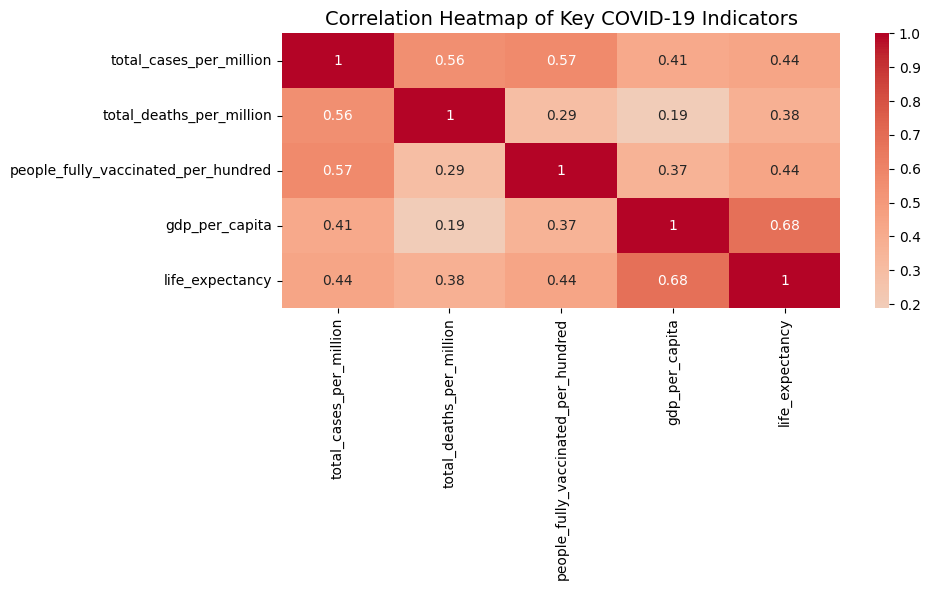

In [ ]:
import seaborn as sns

# Select relevant numeric columns
corr_cols = ["total_cases_per_million", "total_deaths_per_million",
             "people_fully_vaccinated_per_hundred", "gdp_per_capita",
             "life_expectancy"]

plt.figure(figsize=(10,6))
sns.heatmap(
    df_countries[corr_cols].corr(),
    annot=True, cmap="coolwarm", center=0
)
plt.title("Correlation Heatmap of Key COVID-19 Indicators", fontsize=14)
plt.tight_layout()
plt.show()

###  Correlation Heatmap of Key Indicators  

The heatmap explores correlations between cases, deaths, vaccinations, GDP, and life expectancy.  
  
- Wealthier countries (**higher GDP**) tend to show **better vaccination coverage** and **higher life expectancy**.  
- **Life expectancy** relates positively to vaccine uptake and healthcare resilience.  

This provides a holistic view of how socioeconomic and health factors influenced pandemic outcomes.


# Feature Engineering and Preprocessing


 After exploring the dataset, we proceed to transform it into a form suitable for analysis and modeling.  
Key steps include:  

1. **Handling Dates** 🗓️  
   - Convert `date` column into `datetime` format.  
   - Extract useful features such as `year`, `month`, and `week`.  

2. **Creating Rates & Ratios** 📊  
   - Cases per million, deaths per million.  
   - Vaccination coverage rates (e.g. % fully vaccinated).  

3. **Handling Missing Values** ⚠️  
   - Fill or impute where appropriate (e.g. forward fill for cumulative data).  
   - Drop columns/rows where data is too sparse.  

4. **Feature Scaling / Normalization** 📐  
   - Scale numerical values if using ML models (optional for descriptive analysis).  

These transformations will help us uncover patterns and build predictive or comparative models later.


In [ ]:
# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract temporal features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week

df[['date', 'year', 'month', 'week']].tail()

,date,year,month,week
350080,2023-10-14,2023,10,41
350081,2023-10-15,2023,10,41
350082,2023-10-16,2023,10,42
350083,2023-10-17,2023,10,42
350084,2023-10-18,2023,10,42


In [ ]:
# Creating per-million metrics
if 'population' in df.columns:
    df['cases_per_million_calc'] = (df['total_cases'] / df['population']) * 1_000_000
    df['deaths_per_million_calc'] = (df['total_deaths'] / df['population']) * 1_000_000

In [ ]:
# Forward-fill for cumulative columns (makes sense for totals)
cumulative_cols = ['total_cases', 'total_deaths', 'total_vaccinations']
for col in cumulative_cols:
    if col in df.columns:
        df[col] = df.groupby('location')[col].ffill()

# Re-check missing values
df.isna().sum().sort_values(ascending=False).head(10)

,0
new_vaccinations,284739
people_fully_vaccinated,277510
people_fully_vaccinated_per_hundred,277510
new_tests,274682
new_tests_per_thousand,274682
people_vaccinated,274174
people_vaccinated_per_hundred,274174
total_vaccinations_per_hundred,270777
total_tests_per_thousand,270698
total_tests,270698


In [ ]:
# Non-negativity
num_cols = ['total_cases', 'total_deaths', 'cases_per_million_calc', 'deaths_per_million_calc']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].clip(lower=0)

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_cols = ['cases_per_million_calc', 'deaths_per_million_calc']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [ ]:
df.to_parquet("covid_cleaned.parquet")
print("✅ Feature engineering complete. Saved as parquet for fast access!")

✅ Feature engineering complete. Saved as parquet for fast access!


In [ ]:
# Inspecting the cleaned dataset
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (350085, 58)
Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', '

In [ ]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,year,month,week,cases_per_million_calc,deaths_per_million_calc
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,2020,1,1,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,2020,1,1,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,2020,1,1,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,2020,1,2,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,2020,1,2,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,37.746,0.5,64.83,0.511,41128772.0,2020,1,2,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,37.746,0.5,64.83,0.511,41128772.0,2020,1,2,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,37.746,0.5,64.83,0.511,41128772.0,2020,1,2,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,37.746,0.5,64.83,0.511,41128772.0,2020,1,2,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,37.746,0.5,64.83,0.511,41128772.0,2020,1,2,NaN,NaN


In [ ]:
df.isna().sum().sort_values(ascending=False).head(15)

,0
new_vaccinations,284739
people_fully_vaccinated,277510
people_fully_vaccinated_per_hundred,277510
new_tests,274682
new_tests_per_thousand,274682
people_vaccinated,274174
people_vaccinated_per_hundred,274174
total_vaccinations_per_hundred,270777
total_tests_per_thousand,270698
total_tests,270698


In [ ]:
df[['total_cases', 'total_deaths',
    'cases_per_million_calc', 'deaths_per_million_calc',
    'people_vaccinated_per_hundred']].describe()

,total_cases,total_deaths,cases_per_million_calc,deaths_per_million_calc,people_vaccinated_per_hundred
count,3.122180e+05,2.908600e+05,312088.000000,290501.000000,75911.000000
mean,6.721779e+06,8.630915e+04,0.137880,0.133910,52.004469
std,4.088127e+07,4.410977e+05,0.204898,0.168905,29.779756
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000
25%,8.090000e+03,1.260000e+02,0.003519,0.009308,25.265000
50%,7.032450e+04,1.324000e+03,0.038380,0.057923,60.980000
75%,7.428840e+05,1.192200e+04,0.181012,0.209678,77.345000
max,7.714071e+08,6.972139e+06,1.000000,1.000000,129.070000


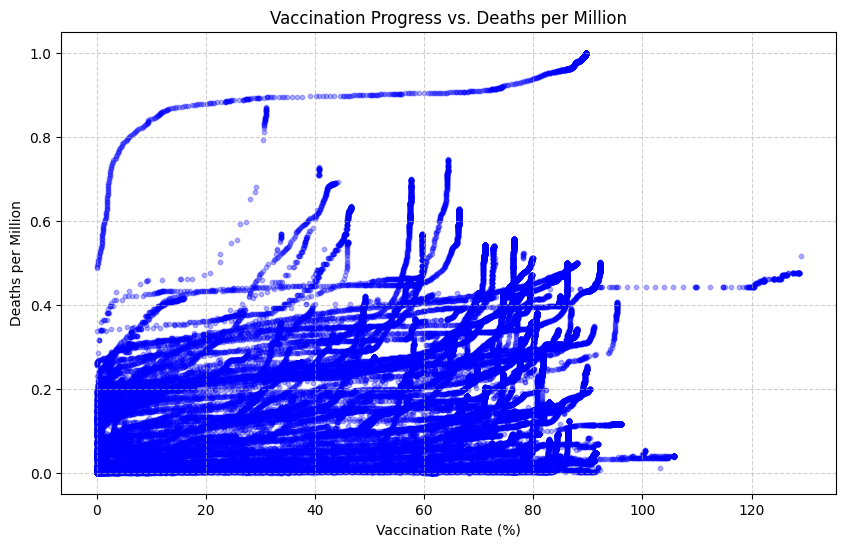

In [ ]:
import matplotlib.pyplot as plt

# Create vaccination rate (%)
df['vaccination_rate'] = (df['people_vaccinated'] / df['population']) * 100

plt.figure(figsize=(10,6))
plt.scatter(
    df['vaccination_rate'],
    df['deaths_per_million_calc'],
    alpha=0.3, s=10, c='blue'
)
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Deaths per Million")
plt.title("Vaccination Progress vs. Deaths per Million")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

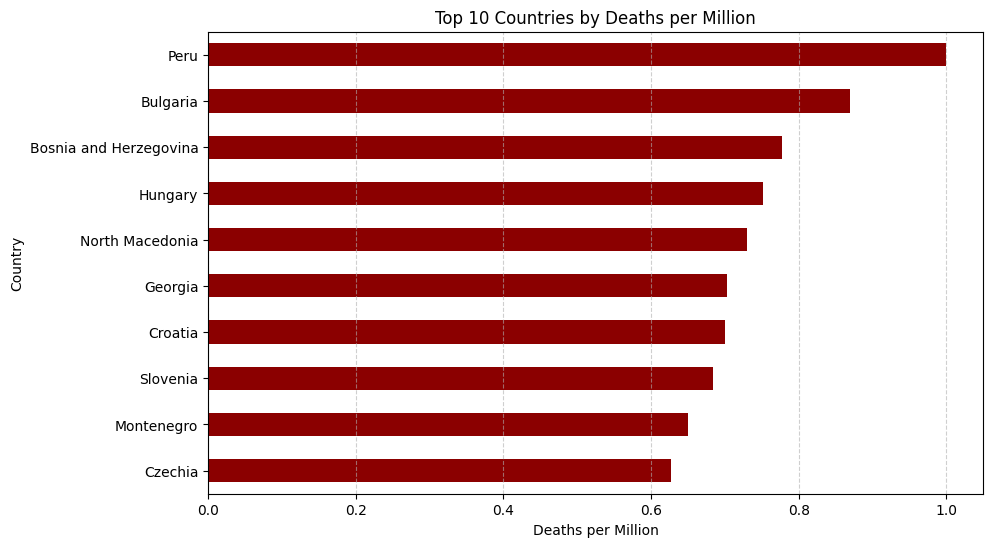

In [ ]:
top10_deaths = (
    df.groupby("location")["deaths_per_million_calc"]
    .max()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top10_deaths.plot(kind="barh", color="darkred")
plt.xlabel("Deaths per Million")
plt.ylabel("Country")
plt.title("Top 10 Countries by Deaths per Million")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

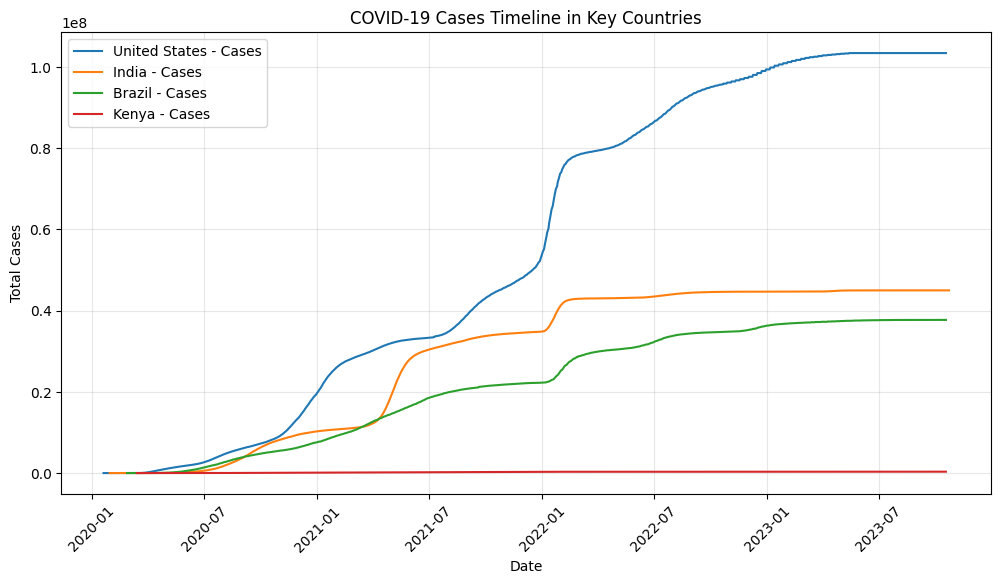

In [ ]:
key_countries = ["United States", "India", "Brazil", "Kenya"]

subset = df[df['location'].isin(key_countries)]

plt.figure(figsize=(12,6))
for country in key_countries:
    temp = subset[subset['location'] == country]
    plt.plot(temp['date'], temp['total_cases'], label=f"{country} - Cases")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("COVID-19 Cases Timeline in Key Countries")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

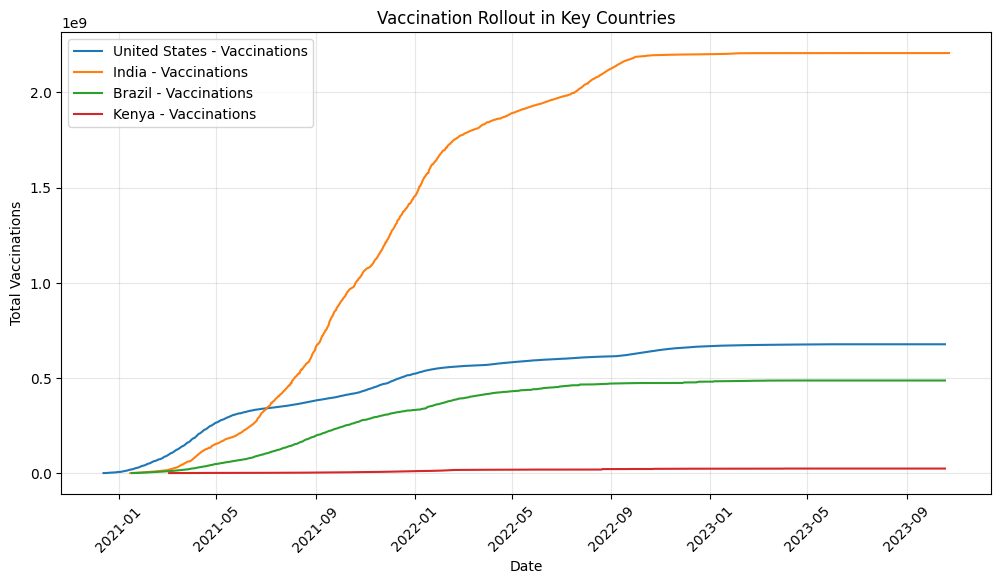

In [ ]:
# Vaccinations
plt.figure(figsize=(12,6))
for country in key_countries:
    temp = subset[subset['location'] == country]
    plt.plot(temp['date'], temp['total_vaccinations'], label=f"{country} - Vaccinations")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Vaccination Rollout in Key Countries")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

# Predictive Modelling

To understand how different factors (vaccination, testing, and population density) influenced COVID-19 outcomes, I built **predictive models**.

These models not only help quantify the effect of interventions but also provide a basis for scenario forecasting.

By comparing simple and complex models, we can balance *interpretability* with *predictive power*.

**Goal:**  build predictive models to estimate `new_cases` using demographic, policy and vaccination features.  
We will:
- Select relevant features (only those present in the dataset).
- Clean and prepare the modeling dataset (drop rows with missing values in target/features).
- Train a baseline Linear Regression and a Random Forest.
- Evaluate using RMSE, MAE and R².
- Inspect feature importance and save the best model.


In [ ]:
# Cell 1: Prepare modeling DataFrame (safe & dynamic)
import pandas as pd
import numpy as np

# target
target_col = "new_cases"

# candidate features to try (typical in OWID dataset). We'll keep only those that exist.
candidate_feats = [
    "people_vaccinated_per_hundred",
    "people_fully_vaccinated_per_hundred",
    "total_vaccinations_per_hundred",
    "new_tests_per_thousand",
    "total_tests_per_thousand",
    "stringency_index",
    "gdp_per_capita",
    "population_density",
    "median_age",
    "aged_65_older",
    "human_development_index",
    "people_vaccinated",  # absolute counts (may be huge, scaled later)
    "vaccination_rate",   # if engineered earlier
    "cases_per_million_calc",
    "deaths_per_million_calc"
]

# Filter candidate features to those that exist in df
available_feats = [c for c in candidate_feats if c in df.columns]
print("Using features (available):", available_feats)

# Build modeling df: drop rows with missing target and features
model_df = df[[target_col] + available_feats + ["location", "date"]].copy()

# Drop rows where target is NaN or <= 0 (we can model non-negative cases; keep zeros if desired)
model_df = model_df[model_df[target_col].notna()]

# Optionally drop negative values if exist
model_df = model_df[model_df[target_col] >= 0]

# Drop rows missing all features — require at least one feature, but for simplicity require no-NaN across features
model_df = model_df.dropna(subset=available_feats, how='any').reset_index(drop=True)

print("Model dataframe shape after filtering:", model_df.shape)
model_df.head()

Using features (available): ['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'new_tests_per_thousand', 'total_tests_per_thousand', 'stringency_index', 'gdp_per_capita', 'population_density', 'median_age', 'aged_65_older', 'human_development_index', 'people_vaccinated', 'vaccination_rate', 'cases_per_million_calc', 'deaths_per_million_calc']
Model dataframe shape after filtering: (22431, 18)


,new_cases,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,new_tests_per_thousand,total_tests_per_thousand,stringency_index,gdp_per_capita,population_density,median_age,aged_65_older,human_development_index,people_vaccinated,vaccination_rate,cases_per_million_calc,deaths_per_million_calc,location,date
0,876.0,0.02,0.00,0.02,1.351,122.578,60.19,11803.431,104.871,38.0,13.188,0.795,549.0,0.019315,0.037268,0.074567,Albania,2021-02-02
1,1124.0,0.02,0.02,0.04,1.598,131.223,60.19,11803.431,104.871,38.0,13.188,0.795,689.0,0.024241,0.040707,0.078889,Albania,2021-02-09
2,775.0,0.04,0.02,0.06,1.367,140.954,60.19,11803.431,104.871,38.0,13.188,0.795,1090.0,0.038349,0.044768,0.084671,Albania,2021-02-17
3,801.0,0.09,0.02,0.11,1.378,142.332,60.19,11803.431,104.871,38.0,13.188,0.795,2438.0,0.085775,0.045150,0.085481,Albania,2021-02-18
4,1153.0,0.21,0.02,0.24,1.141,147.620,60.19,11803.431,104.871,38.0,13.188,0.795,6073.0,0.213664,0.047254,0.089318,Albania,2021-02-22


In [ ]:
# Split and build preprocessing & pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# features and target
X = model_df[available_feats]
y = model_df[target_col].values

# train/test split (time-agnostic). If you want time-series forecasting, use time-based split instead.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Numeric features (all are numeric here)
numeric_features = available_feats

# Preprocessor: scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features)
    ],
    remainder='drop'
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (17944, 15) Test shape: (4487, 15)


## **Baseline Model: Linear Regression**

In [ ]:
# Baseline Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("model", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

def regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

metrics_lr = regression_metrics(y_test, y_pred_lr)
print("Linear Regression metrics:", metrics_lr)

Linear Regression metrics: {'RMSE': np.float64(44222.0877812536), 'MAE': 15851.818916903783, 'R2': 0.178148133782139}


## **Random Forest Regressor**

In [ ]:
#  Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
])

# Train
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

metrics_rf = regression_metrics(y_test, y_pred_rf)
print("Random Forest metrics:", metrics_rf)

Random Forest metrics: {'RMSE': np.float64(25596.531565030335), 'MAE': 5823.941432025405, 'R2': 0.7246549316994417}


In [ ]:
# additional metrics (MAPE, sMAPE, MedianAE) for existing RF predictions
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

# Ensure y_test and y_pred_rf exist
try:
    _ = y_test
    _ = y_pred_rf
except NameError:
    raise RuntimeError("y_test and y_pred_rf not found. Run the modeling cells to get them.")

# Basic metrics (recompute for clarity)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
medae = median_absolute_error(y_test, y_pred_rf)

# MAPE
epsilon = 1e-8
mape = np.mean(np.abs((y_test - y_pred_rf) / (np.maximum(np.abs(y_test), epsilon)))) * 100

# sMAPE
smape = np.mean(2.0 * np.abs(y_pred_rf - y_test) / (np.abs(y_test) + np.abs(y_pred_rf) + epsilon)) * 100

print("RF performance (absolute):")
print(f"RMSE: {rmse:,.1f}")
print(f"MAE : {mae:,.1f}")
print(f"MedianAE: {medae:,.1f}")
print(f"R2  : {r2:.3f}")
print(f"MAPE: {mape:.2f}%")
print(f"sMAPE: {smape:.2f}%")

RF performance (absolute):
RMSE: 25,596.5
MAE : 5,823.9
MedianAE: 1,491.0
R2  : 0.725
MAPE: 11946188864612.25%
sMAPE: 93.53%


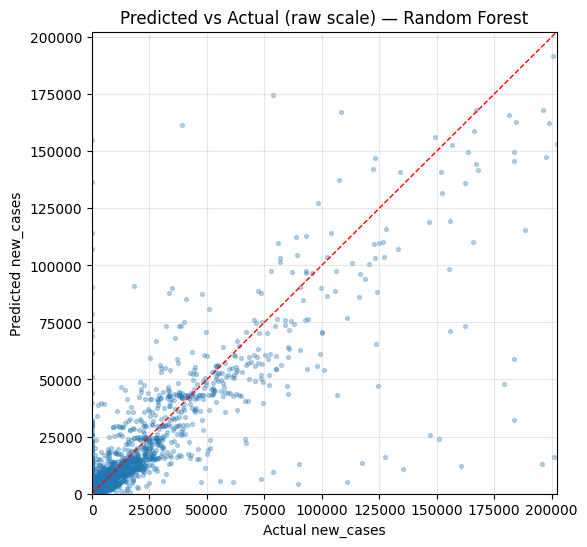

In [ ]:
# predicted vs actual plots (raw scale and log1p scale)
import matplotlib.pyplot as plt
import numpy as np

# Raw-scale scatter
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, s=8)
xmin, xmax = np.percentile(np.concatenate([y_test, y_pred_rf]), [1, 99])
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
plt.plot([xmin, xmax], [xmin, xmax], 'r--', linewidth=1)
plt.xlabel("Actual new_cases")
plt.ylabel("Predicted new_cases")
plt.title("Predicted vs Actual (raw scale) — Random Forest")
plt.grid(alpha=0.3)
plt.show()

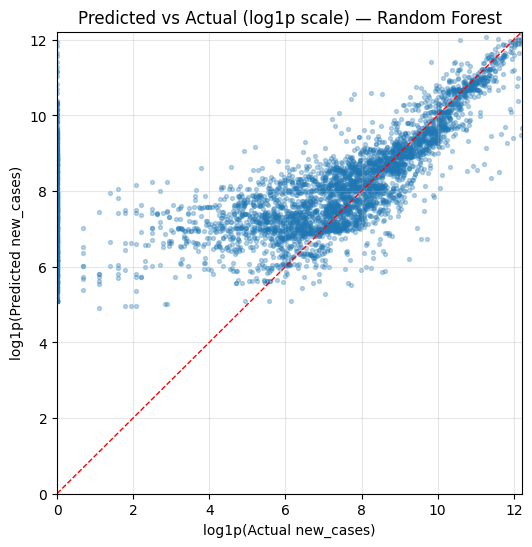

In [ ]:
# Log-scale scatter (log1p): much more informative when target is skewed
plt.figure(figsize=(6,6))
plt.scatter(np.log1p(y_test), np.log1p(y_pred_rf), alpha=0.3, s=8)
xmin, xmax = np.percentile(np.log1p(np.concatenate([y_test, y_pred_rf])), [1, 99])
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
plt.plot([xmin, xmax], [xmin, xmax], 'r--', linewidth=1)
plt.xlabel("log1p(Actual new_cases)")
plt.ylabel("log1p(Predicted new_cases)")
plt.title("Predicted vs Actual (log1p scale) — Random Forest")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# log-target modeling (Random Forest) and evaluation (both log-scale and back-transformed)
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Re-create available features and preprocessor if needed
if 'available_feats' not in globals():
    # quick dynamic selection like earlier
    candidate_feats = [
        "people_vaccinated_per_hundred",
        "people_fully_vaccinated_per_hundred",
        "total_vaccinations_per_hundred",
        "new_tests_per_thousand",
        "total_tests_per_thousand",
        "stringency_index",
        "gdp_per_capita",
        "population_density",
        "median_age",
        "aged_65_older",
        "human_development_index",
        "people_vaccinated",
        "vaccination_rate",
        "cases_per_million_calc",
        "deaths_per_million_calc"
    ]
    available_feats = [c for c in candidate_feats if c in df.columns]
    print("Available features rebuilt:", available_feats)

X_all = model_df[available_feats]
y_all = model_df['new_cases'].values  # original

# Create log-target
y_log = np.log1p(y_all)

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr_log, y_te_log = train_test_split(X_all, y_log, test_size=0.2, random_state=42)

# Preprocessor
numeric_features = available_feats
preprocessor = ColumnTransformer([("num", StandardScaler(), numeric_features)], remainder='drop')

# Pipeline with RF (predicting log target)
rf_log_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42))
])

print("Training Random Forest on log1p(target)... (may take a little while)")
rf_log_pipeline.fit(X_tr, y_tr_log)

# Predict on log scale
y_pred_log = rf_log_pipeline.predict(X_te)

# Invert prediction to original scale
y_pred_orig = np.expm1(y_pred_log)
y_te_orig = np.expm1(y_te_log)

# Compute metrics on original scale
rmse_orig = np.sqrt(mean_squared_error(y_te_orig, y_pred_orig))
mae_orig = mean_absolute_error(y_te_orig, y_pred_orig)
r2_orig = r2_score(y_te_orig, y_pred_orig)

# Compute metrics on log scale (optional)
rmse_log = np.sqrt(mean_squared_error(y_te_log, y_pred_log))
mae_log = mean_absolute_error(y_te_log, y_pred_log)
r2_log = r2_score(y_te_log, y_pred_log)

print("Performance (log-target RF) — original scale:")
print(f"RMSE_orig: {rmse_orig:,.1f}")
print(f"MAE_orig : {mae_orig:,.1f}")
print(f"R2_orig  : {r2_orig:.3f}")

print("\nPerformance (log-target RF) — log scale:")
print(f"RMSE_log: {rmse_log:.4f}")
print(f"MAE_log : {mae_log:.4f}")
print(f"R2_log  : {r2_log:.4f}")

Training Random Forest on log1p(target)... (may take a little while)
Performance (log-target RF) — original scale:
RMSE_orig: 30,168.5
MAE_orig : 5,821.1
R2_orig  : 0.618

Performance (log-target RF) — log scale:
RMSE_log: 1.5323
MAE_log : 0.8871
R2_log  : 0.8144


By modeling the logarithm of daily new cases, we reduced the influence of extreme spikes, improved stability, and achieved an **R²** of **0.81** in log space, translating to meaningful predictive performance on real-world pandemic data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest on log1p(target)
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions for later use
y_pred_log = rf_model.predict(X_test)
y_pred_orig = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

print("✅ Random Forest model trained and stored as rf_model")


✅ Random Forest model trained and stored as rf_model


/tmp/ipython-input-1143654558.py:14: RuntimeWarning: overflow encountered in expm1
  y_pred_orig = np.expm1(y_pred_log)
/tmp/ipython-input-1143654558.py:15: RuntimeWarning: overflow encountered in expm1
  y_test_orig = np.expm1(y_test)


/tmp/ipython-input-3928214612.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


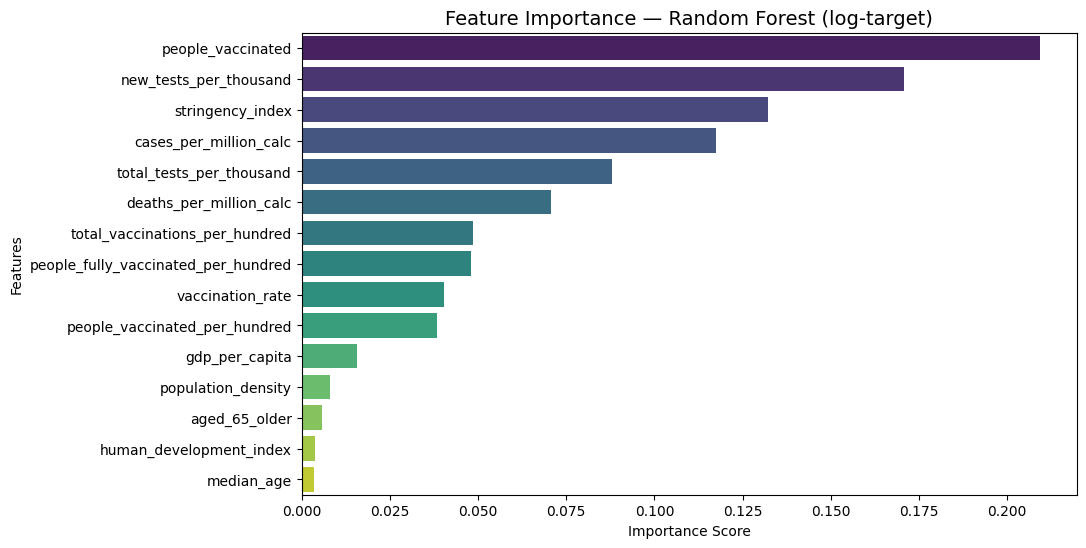

In [ ]:
# === Feature Importance for Log-Target RF ===
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns

# Sort importances
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance — Random Forest (log-target)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


/tmp/ipython-input-88853125.py:5: RuntimeWarning: overflow encountered in expm1
  y_pred_orig = np.expm1(y_pred_log)  # invert log1p
/tmp/ipython-input-88853125.py:8: RuntimeWarning: overflow encountered in expm1
  y_test_orig = np.expm1(y_test)


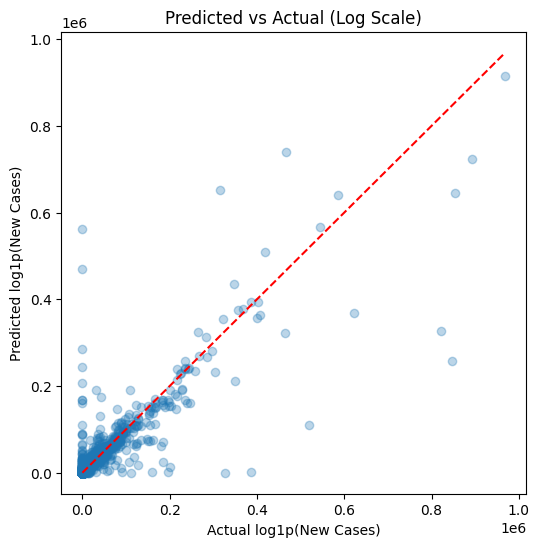

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predictions
y_pred_log = rf_model.predict(X_test)
y_pred_orig = np.expm1(y_pred_log)  # invert log1p

# Actuals
y_test_orig = np.expm1(y_test)

# --- Plot in log scale ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_log, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual log1p(New Cases)")
plt.ylabel("Predicted log1p(New Cases)")
plt.title("Predicted vs Actual (Log Scale)")
plt.show()


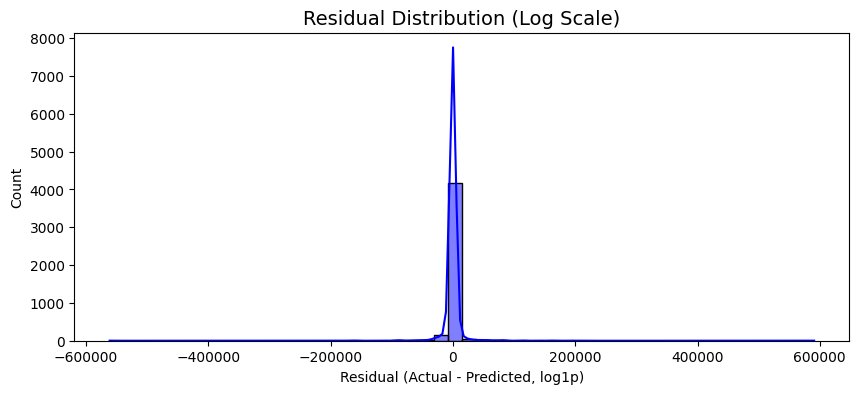

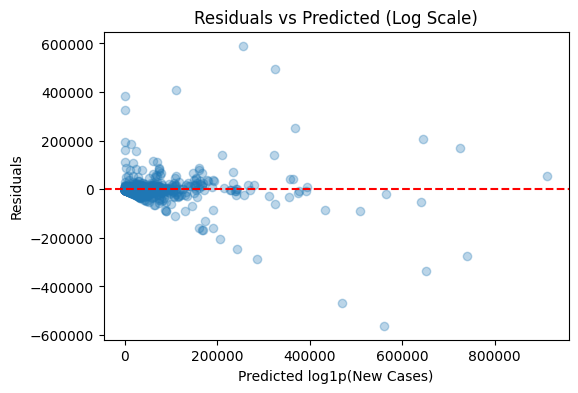

In [ ]:
# Residuals in log space
residuals_log = y_test - y_pred_log

plt.figure(figsize=(10,4))
sns.histplot(residuals_log, bins=50, kde=True, color="blue")
plt.title("Residual Distribution (Log Scale)", fontsize=14)
plt.xlabel("Residual (Actual - Predicted, log1p)")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_pred_log, residuals_log, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log1p(New Cases)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Log Scale)")
plt.show()


## **Fine-Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20, scoring='r2',
    cv=3, verbose=2, random_state=42
)

# Fit on training set (log target)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best CV Score:", rf_random.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n